In [32]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install gif
!{sys.executable} -m pip install mpl
from tqdm import tqdm
import matplotlib.pyplot as plt 
import numpy as np
import gif 
import matplotlib as mpl
import matplotlib.font_manager as fm# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
print(font_names)

You should consider upgrading via the '/Users/twanbolwerk/.pyenv/versions/3.9.7/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/twanbolwerk/.pyenv/versions/3.9.7/bin/python -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement mpl (from versions: none)
ERROR: No matching distribution found for mpl
You should consider upgrading via the '/Users/twanbolwerk/.pyenv/versions/3.9.7/bin/python -m pip install --upgrade pip' command.
['STIXNonUnicode', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Serif Display', 'STIXGeneral', 'STIXNonUnicode', 'cmex10', 'STIXSizeOneSym', 'STIXSizeOneSym', 'DejaVu Serif', 'STIXSizeFiveSym', 'cmsy10', 'STIXNonUnicode', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Sans', 'STIXSizeTwoSym', 'cmr10', 'STIXSizeFourSym', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'cmtt10', 'DejaVu Sans', 'STIXSizeFourSym', 'DejaVu Sans Display', 'DejaVu Serif', 'STI

In [41]:
@gif.frame
def plot_all_the_particles(particles):
    # assert len(particles) > 0, "Oh noes I ran out of particles to plot. oops."
    x = np.linspace(0,20,20)
    y = np.linspace(0,20,20)

    X,Y = np.array(np.meshgrid(x,y))

    z = Euclidean(X,Y)
    
    #print(f"this is self.v 0 {self.v[0]}, and self.v[1] {self.v[1]}")
    mpl.rcParams['font.family'] = 'DejaVu Serif'
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.linewidth'] = 2
    fig = plt.figure(figsize=(8,6))
    plt.imshow(z, extent=[0, 20, 0, 20], origin='lower', cmap='viridis', alpha=0.5)
    plt.colorbar()
    plt.plot(10, 0, marker='*', markersize=20, color="black")
    contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
    plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

    for p in particles:
        plt.quiver(p.y[0], p.y[1], p.v[0], p.v[1]) 
    return fig


def projection(a,b):
      return (np.dot(a, b) / np.dot(b, b)) * b

class Particle:
    def __init__(self, pos, velocity, f, w, c1, c2, r1, r2, xlimit, ps):
        """ 
        pos = starting position 
        velocity = starting velocity 
        f = objective function 
        w = weight 
        c1,c2 = cognition weights 
        r1,r2 = acceleration weights 
        xlimit = bounds on searchspace 

        """  
       
        self.x = pos #position
        self.v = velocity #velocity
        self.y = self.x #personal best_positon
        self.py = np.inf #personal best 
        self.objective = f
        #parameters
        self.w = w #inertia weight
        self.c1 = c1 #acceleration constant 
        self.c2 = c2 #accelartation constant
        self.r1 = r1 
        self.r2 = r2 
        self.exitx = 10 
        self.exity = 0
        self.ps = ps
        self.evac = False

        #storage
        self.history = [self.x] #trajectory in search-space

        
    def evaluation(self): 
        """ 
        A function that updates the personal best fitness value and the corresponding position 
        Returns:        fitness
        """

        fitness = self.objective(self.x[0], self.x[1])
        if fitness < self.py:
            self.py = fitness 
            self.y = self.x
        return fitness 
    
    def update(self, gy, vlimit, xlimit):
        """ 
        Update function to update velocity and position and store the trajectory of the particle
        Arguments:          gy = global best fitness position 
                            vlimit = bound to velocity, type = List
                            xlimit = bound to position, type = List
        
        Note: sometimes your x or v values can explode, in these cases, uncomment bound and use a predefined bound
        """
        self.v = self.w * self.v + (self.c1 * self.r1 * (self.y - self.x)) + (self.c2 * self.r2 * (gy - self.x)) #velocity update
        if  np.sqrt(self.v[0]**2 + self.v[1]**2) < 1: 
            self.v = self.v/np.sqrt(self.v[0]**2 + self.v[1]**2) #vector normalisation
        #bound velocity 
        # if self.v < vlimit[0]:
        #     self.v = vlimit[0]
        # if self.v > vlimit[1]: 
        #     self.v = vlimit[1]
        self.x = self.x + self.v
        #bound position 
        if self.x[0] < xlimit[0]: 
            self.x[0] = xlimit[0]
        if self.x[1] < xlimit[0]: 
            self.x[1] = xlimit[0]
        if self.x[0] > xlimit[1]:
            self.x[0] = xlimit[1]
        if self.x[1] > xlimit[1]:
            self.x[1] = xlimit[1]

        #story trajectory
        self.history.append(self.x)
        #np.append(self.history, self.x)

    def plot(self):

        x = np.linspace(0,20,20)
        y = np.linspace(0,20,20)

        X,Y = np.array(np.meshgrid(x,y))
        z = self.objective(X,Y)
        
        #print(f"this is self.v 0 {self.v[0]}, and self.v[1] {self.v[1]}")
        plt.figure(figsize=(8,6))
        plt.imshow(z, extent=[0, 20, 0, 20], origin='lower', cmap='viridis', alpha=0.5)
        plt.colorbar()
        plt.plot([self.exitx], [self.exity], marker='*', markersize=20, color="black")
        contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
        plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
        plt.quiver(self.x[0], self.x[1], self.v[0], self.v[1]) 

    def speed(self):
        return np.sqrt(self.v[0] ** 2 + self.v[1] ** 2 ) 
    
    def evacuate(self): 
        if self.ps == 200: 
            exit_bound = 0.6 
        elif self.ps == 500: 
            exit_bound = 1.35 
        elif self.ps == 600: 
            exit_bound = 1.6
        elif self.ps == 10:
            exit_bound = 0.6 


        if self.x[0] > 10 - exit_bound and self.x[0] <10 + exit_bound and self.x[1] < 0.5: 
            self.evac = True


        return self.evac

def test_function(x): 
    """
    Takes input and returns the square root
    Note: this was only to test the initial program 
    """
    return x**2

def optimize(iterations, ps):
    """
    Standard PSO function for function optimization 
    Arguments:          iterations, type int 
                        ps, type int; this is the population size of your swarm 
    plots the trajectory of the swarms"""

    Particles = [Particle(np.random.rand(2, 1) * 20, np.random.randn(2, 1) * 0.1 , Euclidean, 0.2, 0.1, 0.1, 2, 2, [-100,100], ps ) for _ in range(ps)]  #initialize particles
    gy = Particles[np.random.randint(0,ps)].x       #initialize global best position by choosing random position of a particle in swarm 
    gy_fit =  np.inf                               #initialize global best fitness value by infinity, in case of maximization use -gy_fit
    speeds = []
    av_speedit = []
    density = []
    giffie = []
    
    for i in range(iterations):
        for p in Particles:         #iterate over particles
            
            p.evaluation()          #check for best values

            best_fitnesses = [p.py for p in Particles]      #stores the best fitness value that particles have known so far
            best_particle_index = np.argmin(best_fitnesses) #checks which particle has the best fitness of the above fitnesses
            best_particle = Particles[best_particle_index]  #selects the best particle of the swarm in the current iteration

            best_fitnesses = np.asarray(best_fitnesses)
            if np.any(best_fitnesses[:] < gy_fit):         #updates the global best if the best particle of iteration has better values
                gy_fit = np.min(best_fitnesses)
                gy = best_particle.x

            if p.evacuate(): 
                Particles.remove(p)
                print(f"this is amount of par {len(Particles)}")
                if len(Particles) == 0: 
                    print("everyone evacuated")

            else:
                p.update(gy, [-10,10], [0,20])
                speeds.append(p.speed())
                # p.plot()
        if len(Particles) != 0:
            average_velocity = sum(speeds)/len(Particles)
            
            av_speedit.append(average_velocity)
            
            density.append(np.sqrt(len(Particles)/ 12 * np.pi))
            
        else: 
            av_speedit.append(0)
            density.append(0)
        giffie.append(plot_all_the_particles(Particles))
    mpl.rcParams['font.family'] = 'DejaVu Serif'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.linewidth'] = 2
    plt.plot(density, av_speedit)
    plt.xlabel("Density (1/$m^2)$")
    plt.ylabel("Average Velocity")
    gif.save(giffie, 'evac.gif', duration=100)    
            

def Euclidean(X, Y):
    """ 
    Euclidean distance 
    Arguments       dataloc, type == type of position
                    centroid_location, type == type of centroid
                    
    Returns the sqrt of the dotproduct of the data/centroid matrices
    """
    
    return np.sqrt((10 - X)**2 + ( 0 - Y)**2) #returns a list with euclidean distance for each particle? 



/var/folders/fm/410b0ysd15x60v5sq_js3t8c0000gn/T/ipykernel_18976/1361299272.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  best_fitnesses = np.asarray(best_fitnesses)


this is amount of par 199
this is amount of par 198
this is amount of par 197
this is amount of par 196
this is amount of par 195
this is amount of par 194
this is amount of par 193
this is amount of par 192
this is amount of par 191
this is amount of par 190
this is amount of par 189
this is amount of par 188
this is amount of par 187
this is amount of par 186
this is amount of par 185
this is amount of par 184
this is amount of par 183
this is amount of par 182
this is amount of par 181
this is amount of par 180
this is amount of par 179
this is amount of par 178
this is amount of par 177
this is amount of par 176
this is amount of par 175
this is amount of par 174
this is amount of par 173
this is amount of par 172
this is amount of par 171
this is amount of par 170
this is amount of par 169
this is amount of par 168
this is amount of par 167
this is amount of par 166
this is amount of par 165
this is amount of par 164
this is amount of par 163
this is amount of par 162
this is amou

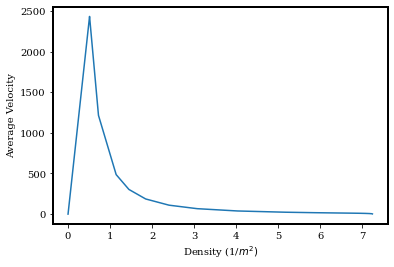

In [42]:
#try out

optimize(100,200)